In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [590]:
boston = pd.read_csv("./boston.csv")

# Data Analysis

In [591]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# Dataset Description

  
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's




In [592]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [593]:
np.shape(boston)

(506, 14)

In [594]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [595]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


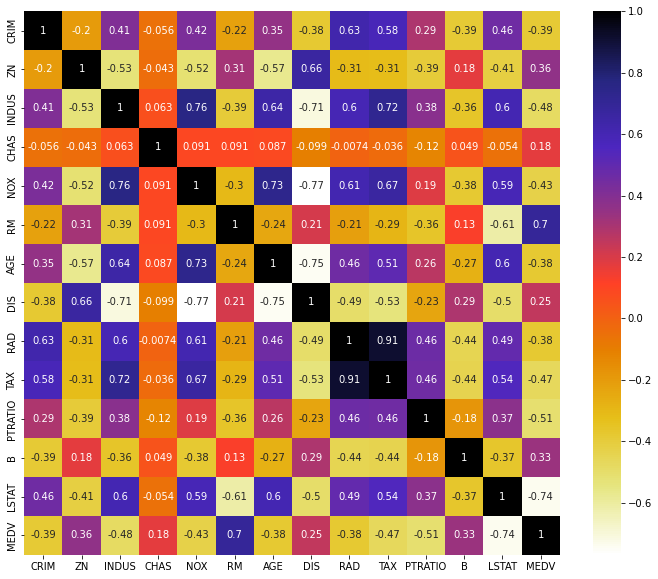

In [596]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [597]:
X1 = boston.drop(["MEDV","TAX"],axis=1) # new Feature matrix
y = boston["MEDV"] #target variable
X1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,15.2,386.71,17.10


In [598]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

# Visualizing relationships of different feature columns wrt Y.

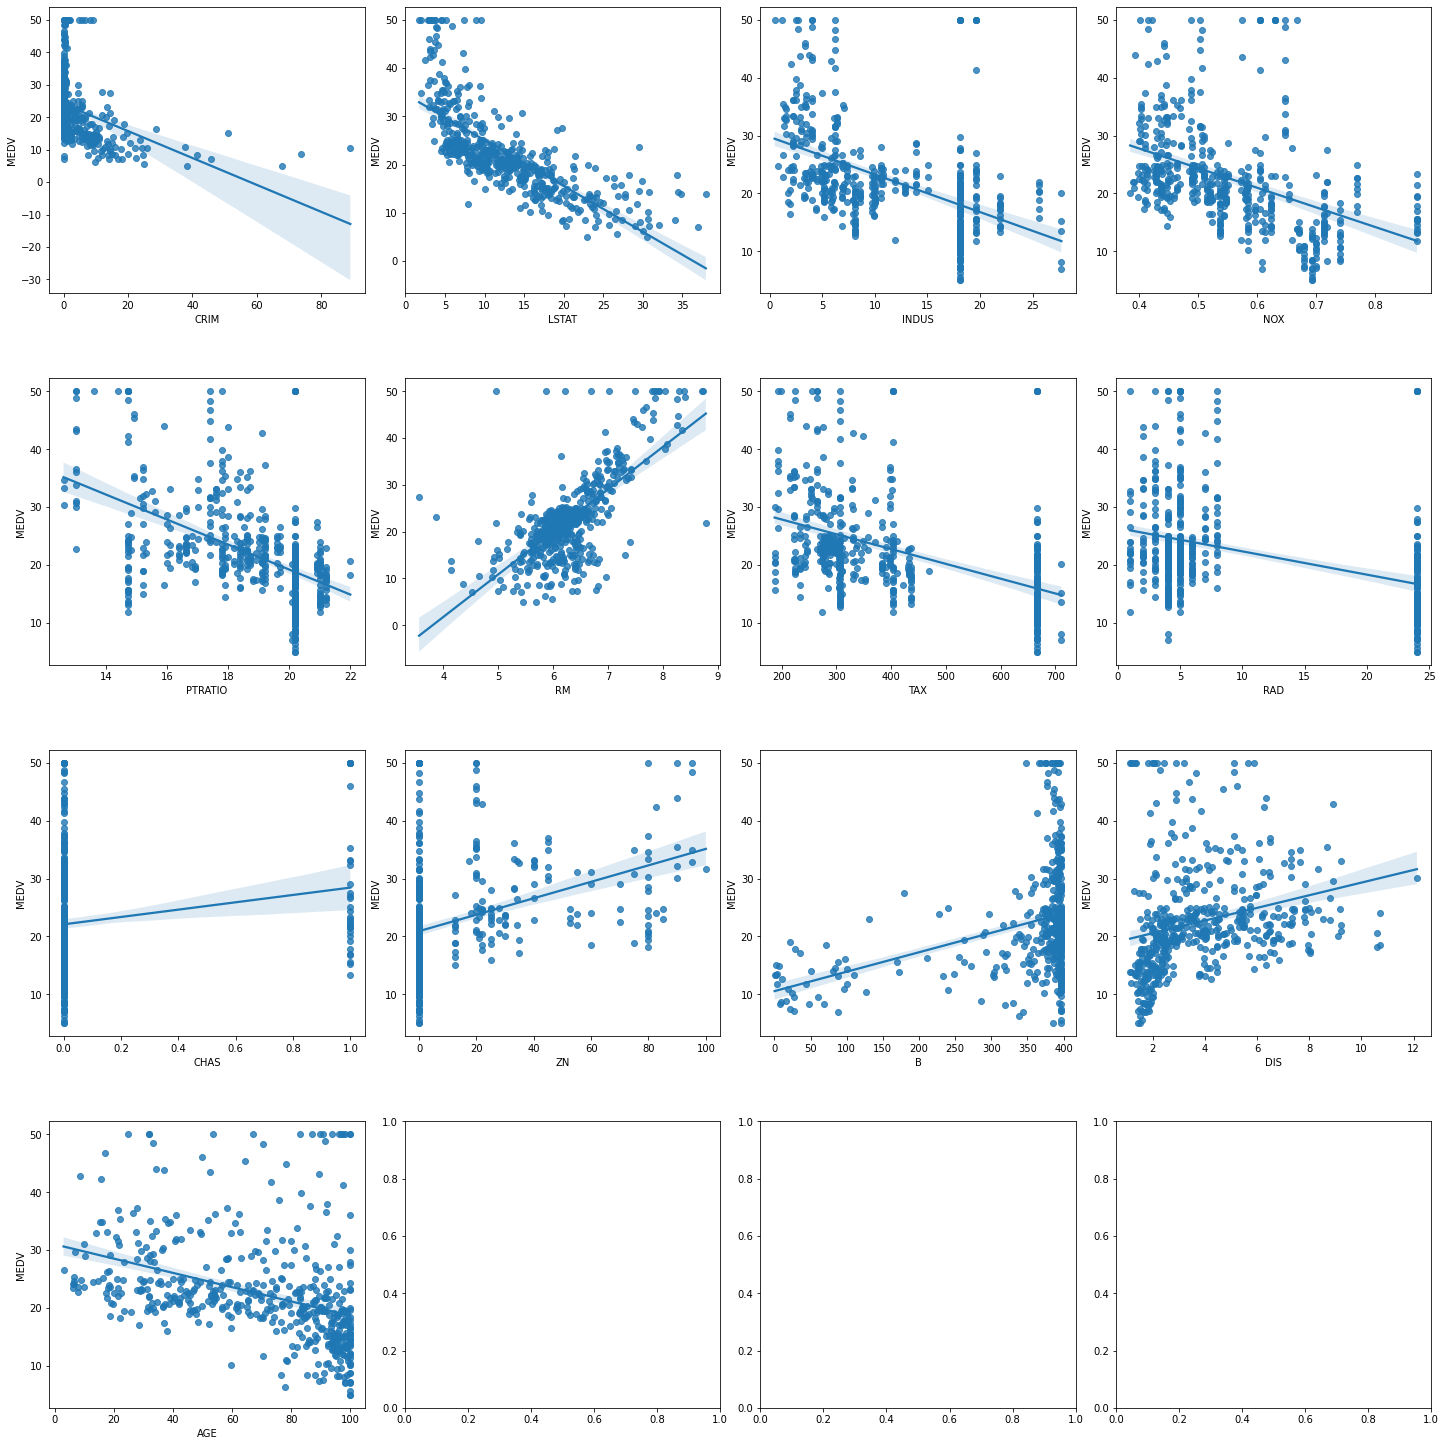

In [599]:
x_feature = ["CRIM",'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', "RAD","CHAS",'ZN','B','DIS', 'AGE']
x = boston.loc[:,x_feature]
y = boston['MEDV']
x = pd.DataFrame(data=x, columns=x_feature)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(x_feature):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



# Seeing some relationships between features

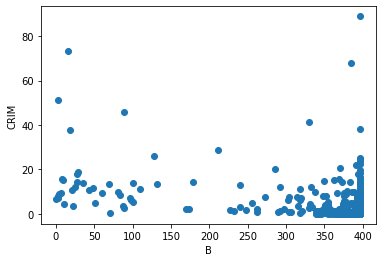

In [600]:
plt.scatter(boston['B'],boston['CRIM'])
plt.ylabel('CRIM')
plt.xlabel('B')
plt.show()


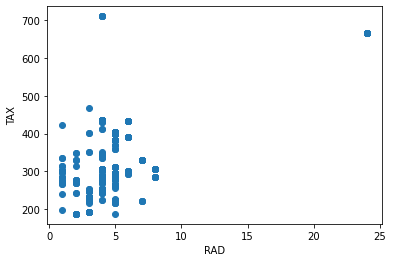

In [601]:
plt.scatter(boston['RAD'],boston['TAX'])
plt.ylabel('TAX')
plt.xlabel('RAD')
plt.show()

**From the above data analysis we can say that the following features are not good features: RAD, TAX , CHAS.
They do not show much dependencies with our dependent variable MEDV
So we remove them out from our training and testing dataset**

# Removing outliers

In [602]:
boston.shape

(506, 14)

In [603]:
max_threshold=boston['RM'].quantile(0.95)
min_threshold=boston['RM'].quantile(0.05)
boston=boston[(boston['RM']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['LSTAT'].quantile(0.95)
min_threshold=boston['LSTAT'].quantile(0.05)
boston=boston[(boston['LSTAT']>min_threshold) & (boston['LSTAT']<max_threshold)]

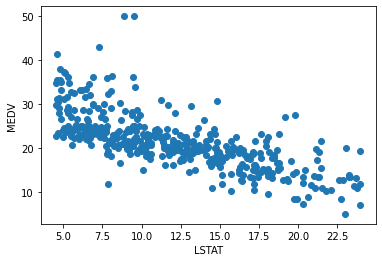

In [604]:
plt.scatter(boston['LSTAT'],boston['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [605]:
boston['LSTAT'].shape

(408,)

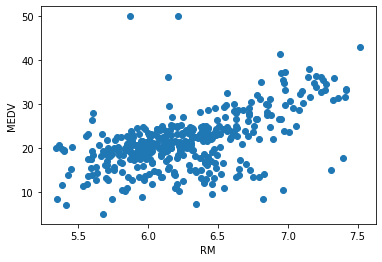

In [606]:
plt.scatter(boston['RM'],boston['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [607]:
boston['RM'].shape

(408,)



# Univariate Linear Regression:

**with feature as LSTAT**

In [608]:
#creating train-test split
suf_boston = pd.DataFrame.sample(boston,frac=1)
train_size = int(0.7*len(boston))

train_boston = suf_boston[:train_size]
test_boston = suf_boston[train_size:]

In [609]:
print("train_boston: "+str(len(train_boston))+" test_boston:"+str(len(test_boston)))

train_boston: 285 test_boston:123


In [610]:
lstat_train = train_boston.LSTAT
lstat_test = test_boston.LSTAT

y_train = train_boston.MEDV
y_test = test_boston.MEDV

In [611]:
lstat_train.head(10)

111    10.16
193     5.03
116    12.04
344     4.61
128    15.39
476    18.68
484    13.34
46     14.15
336     9.80
117    10.30
Name: LSTAT, dtype: float64

# Cost function and Gradient descent(univariate)

In [612]:
#calculating mean squared error
def cost_function(y_true,y_pred):
    cost = np.sum((y_pred-y_true)**2)/len(y_true)
    return cost

#gradient descent

def gradient_descent(x, y, iterations, learning_rate,threshold = 1e-6):
    curr_weight = 1.00
    curr_bias = 20.00   
    it = iterations
    alpha = learning_rate
    n = float(len(x))
    
    costs = []
    weights = []
    previous_cost = None
    
    for i in range(it):
        y_pred = (curr_weight*x) + curr_bias
        
        curr_cost = cost_function(y, y_pred)
        
        if previous_cost and abs(previous_cost-curr_cost)<=threshold:
            break
            
        previous_cost = curr_cost
        costs.append(curr_cost)
        weights.append(curr_weight)
        
        d_weight = -(2/n) *np.sum((y-y_pred)*x)
        d_bias = -(2/n) * np.sum(y-y_pred)
        
        curr_weight = curr_weight - (alpha * d_weight)
        curr_bias = curr_bias - (alpha * d_bias)
        
        
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

    plt.figure(figsize = (8,6))
    plt.plot(weights)
    plt.title("Weight vs Iterations")
    plt.ylabel("Weight")
    plt.xlabel("Iterations")
    plt.show()
     
    return curr_weight, curr_bias


    
        
        
        
        

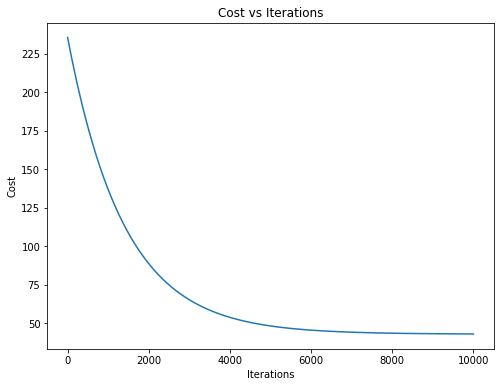

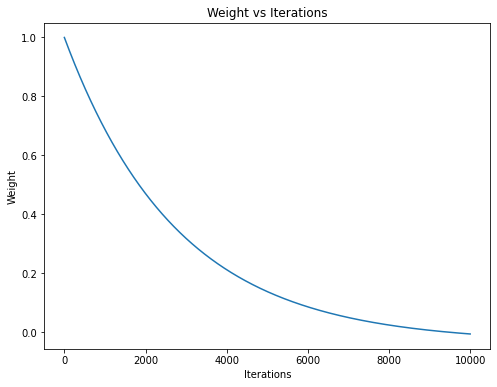

Estimated Weight: -0.005707599371811811
Estimated Bias: 19.96751653996051


In [613]:
optimum_weight, optimum_bias = gradient_descent(np.array(lstat_train), np.array(y_train), iterations=10000, learning_rate=0.000001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [614]:
Y_pred = optimum_weight*lstat_test + optimum_bias
MSE = np.square(y_test-Y_pred).mean()
print("MSE: " ,MSE)

MSE:  41.78627669091374


# Testing against feature RM

In [615]:
#testing agianst feature RM
rm_train = train_boston.RM
rm_test = test_boston.RM

rm_train.head(10)

111    6.715
193    6.800
116    6.176
344    6.874
128    6.431
476    6.484
484    5.871
46     5.786
336    5.869
117    6.021
Name: RM, dtype: float64

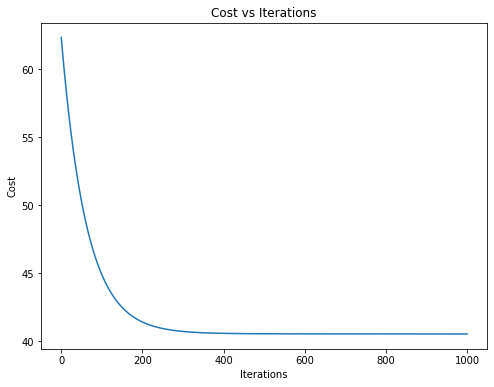

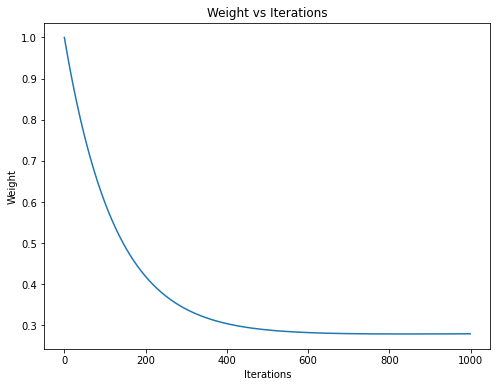

Estimated Weight: 0.27967642658874003
Estimated Bias: 19.8430725964331


In [616]:
optimum_weight, optimum_bias = gradient_descent(np.array(rm_train), np.array(y_train), iterations=1000, learning_rate=0.0001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [617]:
Y_pred = optimum_weight*rm_test +optimum_bias
MSE = np.square(y_test-Y_pred).mean()
print("MSE: ",MSE)

MSE:  38.100336941771694


**with univariate linear regression we see that the MSE is significantly large**

# Univariate Linear Regression (closed form)

In [618]:
def closed_form_univariateLR(x,y):
    n  = x.shape
    X = np.c_[x,np.ones(n)]
    Xd = np.dot(X.T,X)
    temp = Xd[0][0]
    Xd[0][0] = Xd[1][1]
    Xd[1][1] = temp
    Xdi = np.linalg.inv(Xd)
    y_sum = np.sum(y)
    xy_sum = np.sum(np.dot(x,y))
    y_mat = np.array([y_sum,xy_sum])
    values = np.dot(Xdi,y_mat.T)
    return values[0] , values[1]


    

In [619]:
 opt_bias , opt_weight = closed_form_univariateLR(rm_train,y_train)
print(f"Estimated Weight: {opt_weight}\nEstimated Bias: {opt_bias}")

Estimated Weight: 6.984198462636772
Estimated Bias: -22.23439459616562


In [620]:
Y_pred1 = opt_weight*rm_test +opt_bias
MSE = np.square(y_test-Y_pred1).mean()
print("MSE: ",MSE)

MSE:  21.73594796535818


# Multivariate Linear regression

selecting features which have absolute correlation with MEDV above or equal to 0.5

In [621]:
X = boston.drop(["CRIM", 'NOX', "RAD","CHAS",'ZN','B','DIS', 'AGE','MEDV'], axis=1)
Y = boston['MEDV']
X.head(10)

,INDUS,RM,TAX,PTRATIO,LSTAT
0,2.31,6.575,296.0,15.3,4.98
1,7.07,6.421,242.0,17.8,9.14
4,2.18,7.147,222.0,18.7,5.33
5,2.18,6.430,222.0,18.7,5.21
6,7.87,6.012,311.0,15.2,12.43
7,7.87,6.172,311.0,15.2,19.15
9,7.87,6.004,311.0,15.2,17.10
10,7.87,6.377,311.0,15.2,20.45
11,7.87,6.009,311.0,15.2,13.27
12,7.87,5.889,311.0,15.2,15.71


**Normalizing the data**

In [622]:
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

X.head(10)

,INDUS,RM,TAX,PTRATIO,LSTAT
0,0.058148,0.565717,0.206501,0.287234,0.022634
1,0.234444,0.494945,0.103250,0.553191,0.236626
4,0.053333,0.828585,0.065010,0.648936,0.040638
5,0.053333,0.499081,0.065010,0.648936,0.034465
6,0.264074,0.306985,0.235182,0.276596,0.405864
7,0.264074,0.380515,0.235182,0.276596,0.751543
9,0.264074,0.303309,0.235182,0.276596,0.646091
10,0.264074,0.474724,0.235182,0.276596,0.818416
11,0.264074,0.305607,0.235182,0.276596,0.449074
12,0.264074,0.250460,0.235182,0.276596,0.574588


removing outliers from the features

In [623]:
max_threshold=boston['RM'].quantile(0.95)
min_threshold=boston['RM'].quantile(0.05)
boston=boston[(boston['RM']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['LSTAT'].quantile(0.95)
min_threshold=boston['LSTAT'].quantile(0.05)
boston=boston[(boston['LSTAT']>min_threshold) & (boston['LSTAT']<max_threshold)]

max_threshold=boston['TAX'].quantile(0.95)
min_threshold=boston['TAX'].quantile(0.05)
boston=boston[(boston['TAX']>min_threshold) & (boston['RM']<max_threshold)]

max_threshold=boston['PTRATIO'].quantile(0.95)
min_threshold=boston['PTRATIO'].quantile(0.05)
boston=boston[(boston['PTRATIO']>min_threshold) & (boston['LSTAT']<max_threshold)]

max_threshold=boston['INDUS'].quantile(0.95)
min_threshold=boston['INDUS'].quantile(0.05)
boston=boston[(boston['INDUS']>min_threshold) & (boston['LSTAT']<max_threshold)]

In [624]:
print(X.shape,Y.shape)

(408, 5) (408,)


Train-Test split

In [625]:
suf_X = pd.DataFrame.sample(X,frac=1)
train_size = int(0.7*len(X))

train_X = suf_X[:train_size]
test_X = suf_X[train_size:]

suf_Y = pd.DataFrame.sample(Y,frac=1)
train_size = int(0.7*len(Y))

train_Y = suf_Y[:train_size]
test_Y = suf_Y[train_size:]

print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)
train_X.head(10)

(285, 5) (123, 5) (285,) (123,)


,INDUS,RM,TAX,PTRATIO,LSTAT
114,0.343333,0.418199,0.466539,0.553191,0.304012
372,0.642963,0.244026,0.913958,0.808511,0.223251
176,0.122593,0.310662,0.206501,0.425532,0.286523
382,0.642963,0.088235,0.913958,0.808511,0.980453
1,0.234444,0.494945,0.103250,0.553191,0.236626
281,0.095926,0.746324,0.053537,0.244681,0.002572
312,0.339259,0.312040,0.221797,0.617021,0.369342
212,0.364815,0.212776,0.170172,0.638298,0.591049
459,0.642963,0.338695,0.913958,0.808511,0.522634
67,0.197407,0.245404,0.300191,0.670213,0.183128


In [631]:
def gd_multipleLR(x,y,iterations,alpha,threshold):
    n = float(285)
    current_weight = np.ones(5,dtype=float)
    current_bias = np.ones(285,dtype=float)   
    it = iterations
    
    
    costs = []
    previous_cost = None

    # y_pred = np.dot(x,current_weight.T) + current_bias
    # print(y.shape,y_pred.shape,x.shape)
    current_cost= None
    for i in range(it):
        y_pred = np.dot(x,current_weight) + current_bias
        
        current_cost = cost_function(y, y_pred)
        
        if previous_cost and abs(previous_cost-current_cost)<=threshold:
            break
            
        previous_cost = current_cost
        costs.append(current_cost)
        
        d_weight = np.empty(5,dtype=float)
        k =0
        for column in x:
            d_weight[k] = -(2/n) *np.sum(np.dot((y-y_pred),x[column].values.T))
            k += 1

        d_bias = -(2/n) * np.sum(y-y_pred)

        
        
        current_weight = np.subtract(current_weight,(alpha * d_weight))
        current_bias = current_bias - (alpha * d_bias)
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

    return current_weight, current_bias
    
    

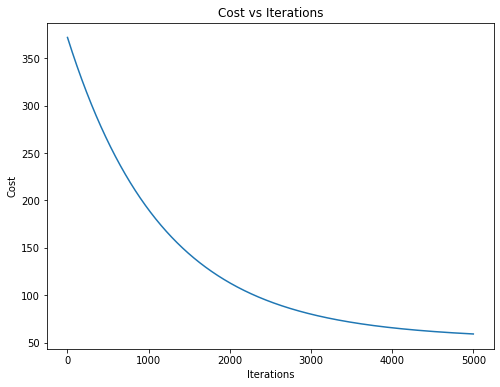

[3.49034434 4.43464151 3.55612125 5.67293432 3.59256301]
8.897060854792896


(5,)

In [636]:
opt_weight, opt_bias = gd_multipleLR(train_X,train_Y,iterations=5000,alpha=0.0001,threshold=1e-6)

print(opt_weight)
print(opt_bias[0])

opt_weight.shape

In [637]:
Y_pred1 = np.dot(test_X,opt_weight) +opt_bias[0:123]
MSE = np.square(y_test-Y_pred1).mean()
print("MSE: ",MSE)

MSE:  62.53782544607153


# Multivariate Linear regression (closed form)

In [642]:
def closed_form_multipleLR(x,y):
    n  = len(x)
    X = np.c_[np.ones(n),x]
    Xd = np.dot(X.T,X)
    Xdi = np.linalg.inv(Xd)
    Xdit = np.dot(Xdi,X.T)
    W = np.dot(Xdit,y)
    
    return W

In [644]:
opt_weight = closed_form_multipleLR(train_X,train_Y)

opt_weight.shape

(6,)

In [647]:
test_Xd = np.c_[np.ones(len(test_X)),test_X]
Y_pred2 = np.dot(test_Xd,opt_weight)
MSE = np.square(y_test-Y_pred2).mean()
print("MSE: ",MSE)

MSE:  39.884435956904355
